In [ ]:
Quit;
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

In [ ]:
ai = {1,1.11724,3.12672 10^(-1),-4.68049 10^(-2),-2.65004 10^(-2),-1.19760 10^(-3),1.82812 10^(-4),1.36436 10^(−4),8.55051 10^(−5),1.22840 10^(−5),3.82259 10^(-7),−6.87035 10^(−9)};
bi = {1.43382 10^(−2),1.37559 10^(−2),2.92108 10^(−3),−5.38533 10^(−4),−1.62496 10^(−4),−2.87906 10^(−5),−3.84278 10^(−6),2.78776 10^(−6),7.40342 10^(−7),1.17210 10^(−7),3.72499 10^(−9),−6.74107 10^(−11)};
ci = {1,6.07869 10^(−1),−1.54485 10^(−1),−2.24034 10^(−1),−2.82147 10^(−2),2.90620 10^(−2),6.86778 10^(−3),−1.00005 10^(−3),−1.69104 10^(−4),1.06301 10^(−5),1.69528 10^(−6),−9.33311 10^(−8)};
di = {7.07388 10,9.18011 10,3.31892 10,−1.39779,−1.52558,−1.97857 10^(−2),−1.60146 10^(−1),8.22615 10^(−5),2.02651 10^(−2),−1.82134 10^(−5),7.83943 10^(−5),7.13518 10^(−5)};

In [ ]:
grhohigh[T_] = Sum[ai[[i]]Log[T]^(i-1),{i,12}] / Sum[bi[[i]]Log[T]^(i-1),{i,12}];
gshigh[T_] = grhohigh[T] / (1 + Sum[ci[[i]]Log[T]^(i-1),{i,12}]/Sum[di[[i]]Log[T]^(i-1),{i,12}]);

In [ ]:
Sfit[x_] = 1 + 7/4 Exp[−1.0419x](1 + 1.034x + 0.456426x^2 + 0.0595249x^3);
frho[x_] = Exp[−1.04855x](1 + 1.03757x + 0.508630x^2 + 0.0893988x^3);
brho[x_] = Exp[−1.03149x](1 + 1.03317x + 0.398264x^2 + 0.0648056x^3);
fs[x_] = Exp[−1.04190x](1 + 1.03400x + 0.456426x^2 + 0.0595248x^3);
bs[x_] = Exp[−1.03365x](1 + 1.03397x + 0.342548x^2 + 0.0506182x^3);

In [ ]:
me = 511 10^(-6);
mmu = 0.1056;
mpi0 = 0.13;
mpipm = 0.140;
m1 = 0.5;
m2 = 0.77;
m3 = 1.2;
m4 = 2;

In [ ]:
grholow[T_] = 2.030 + 1.353Sfit[me/T]^(4/3) + 3.495frho[me/T] + 3.446frho[mmu/T] + 1.05brho[mpi0/T] + 2.08brho[mpipm/T] + 4.165brho[m1/T] + 30.55brho[m2/T] + 89.4brho[m3/T] + 8209brho[m4/T];
gslow[T_] = 2.008 + 1.923Sfit[me/T] + 3.442fs[me/T] + 3.468fs[mmu/T] + 1.034bs[mpi0/T] + 2.068bs[mpipm/T] + 4.16bs[m1/T] + 30.55bs[m2/T] + 90bs[m3/T] + 6209bs[m4/T];

In [ ]:
Tth = 0.12;

In [ ]:
grho[T_] := grhohigh[T] /; T>=Tth
grho[T_] := grholow[T] /; T<Tth
grhop[T_] := grhohigh'[T] /; T>=Tth
grhop[T_] := grholow'[T] /; T<Tth
gs[T_] := gshigh[T] /; T>=Tth
gs[T_] := gslow[T] /; T<Tth
gsp[T_] := gshigh'[T] /; T>=Tth
gsp[T_] := gslow'[T] /; T<Tth

General::munfl: 
 Exp[-110680.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-134037.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-144347.] is too small to represent as a normalized machine number;
 precision may be lost.

General::stop: Further output of General::munfl
 will be suppressed during this calculation.
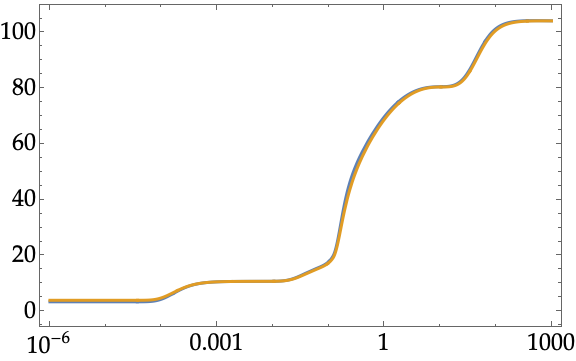

In [ ]:
LogLinearPlot[{grho[T],gs[T]},{T,10^(-6),10^3}]

In [ ]:
EoSw[T_] = 4gs[T] / (3grho[T]) - 1;
cs2[T_] = 4(4gs[T] + T gsp[T]) / (3(4grho[T] + T grhop[T])) - 1;

General::munfl: 
 Exp[-110680.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-134037.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-144347.] is too small to represent as a normalized machine number;
 precision may be lost.

General::stop: Further output of General::munfl
 will be suppressed during this calculation.
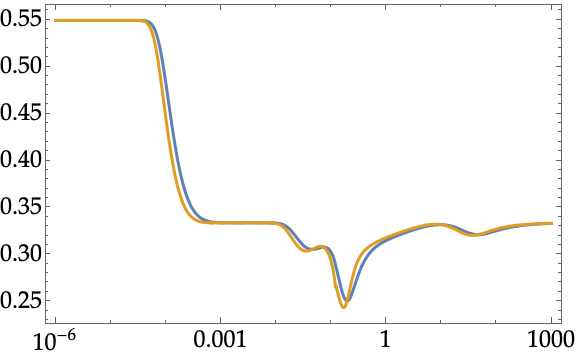

In [ ]:
LogLinearPlot[{EoSw[T],cs2[T]},{T,10^(-6),10^3}]

In [ ]:
Tloww = T /. FindRoot[EoSw[T] == 1/3 , {T, 0.01}]
Tlowcs2 = T /. FindRoot[cs2[T] == 1/3, {T, 0.01}]

Out[132]:
 
 
 0.00959631 
 
 Out[133]:
 
 
 0.00835597

In [ ]:
EoSwfix[T_] := EoSw[T] /; T>=Tloww
EoSwfix[T_] := 1/3 /; T<Tloww
cs2fix[T_] := cs2[T] /; T>=Tlowcs2
cs2fix[T_] := 1/3 /; T<Tlowcs2

General::munfl: 
 Exp[-110664.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-134018.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-144327.] is too small to represent as a normalized machine number;
 precision may be lost.

General::stop: Further output of General::munfl
 will be suppressed during this calculation.
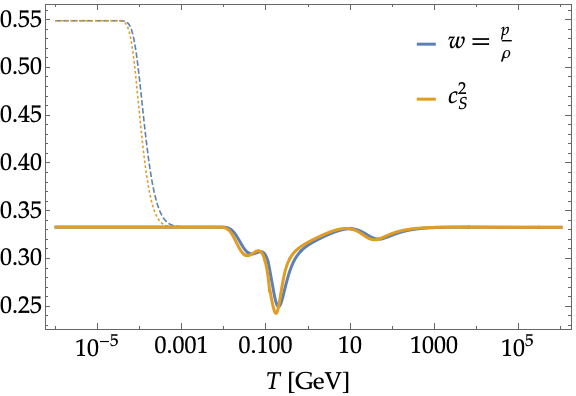

In [ ]:
LogLinearPlot[{EoSw[T],cs2[T],EoSwfix[T],cs2fix[T]},{T,10^(-6),10^6},PlotStyle->{Dashed,Dotted,{AbsoluteThickness[3],Color[[1]]},{AbsoluteThickness[3],Color[[2]]}},PlotRange->Full,
             PlotLegends->Placed[{None,None,w == p/\[Rho],Subscript[c,S]^2},{0.8,0.8}],FrameLabel->{ToString[TraditionalForm[T]]<>" [GeV]",None}]

In [ ]:
Mpl = 2.435 10^18;
KinGeV = 1 / (1.160451812 10^4) 10^(-9)
Mpcinm = 3.08568 10^22;
GeVinminv = 10^9 / (1.97327 10^(-7))
GeVinMpcinv = GeVinminv Mpcinm

Out[196]:
 
 
 -14
8.61733 10 
 
 Out[198]:
 
 
 15
5.06773 10 
 
 Out[199]:
 
 
 38
1.56374 10

In [ ]:
gs0 = gs[10^(-6)]
T0 = 2.725 KinGeV

General::munfl: 
 Exp[-110025.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-134375.] is too small to represent as a normalized machine number;
 precision may be lost.

General::munfl: 
 Exp[-144711.] is too small to represent as a normalized machine number;
 precision may be lost.

General::stop: Further output of General::munfl
 will be suppressed during this calculation.
 
 
 Out[189]:
 
 
 3.931 
 
 Out[190]:
 
 
 -13
2.34822 10

In [ ]:
rho[T_] = \[Pi]^2/30 grho[T]T^4;
scalea[T_] = (gs0/gs[T])^(1/3) T0/T;
calH[T_] = Sqrt[scalea[T]^2rho[T]/3/Mpl^2];

In [ ]:
Ti = 10^6;
rhoi = rho[Ti]
etai = 1/calH[Ti] /GeVinMpcinv

Out[240]:
 
 
 25
3.4384 10 
 
 Out[241]:
 
 
 -14
5.84589 10

In [ ]:
etaf = 0.1;

NDSolve::precw: 
 The precision of the differential equation (
 7 3/2 2
 -2.36441 10 (1 + EoSwfix[T[eta]]) grho[T[eta]] T[eta]
 {{T'[eta] == ----------------------------------------------------------, 
 1/3
 gs[T[eta]] (4 grho[T[eta]] + grhop[T[eta]] T[eta])
 -14
 T[5.84589 10 ] == 1000000}, {}, {}, {}, {}}) is less than
 WorkingPrecision (30.).
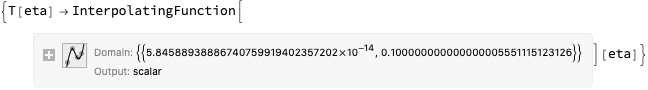

In [ ]:
bgsol = NDSolve[{T'[eta] == -\[Pi]/Sqrt[10] gs0^(1/3)T0/Mpl (1+EoSwfix[T[eta]])grho[T[eta]]^(3/2)T[eta]^2 / (gs[T[eta]]^(1/3)(grhop[T[eta]]T[eta]+4grho[T[eta]])) GeVinMpcinv,
                T[etai] == Ti},
               T[eta],{eta,etai,etaf}, WorkingPrecision->30][[1]]

In [ ]:
Tsol[eta_] = T[eta] /. bgsol;
calHsol[eta_] = calH[Tsol[eta]];


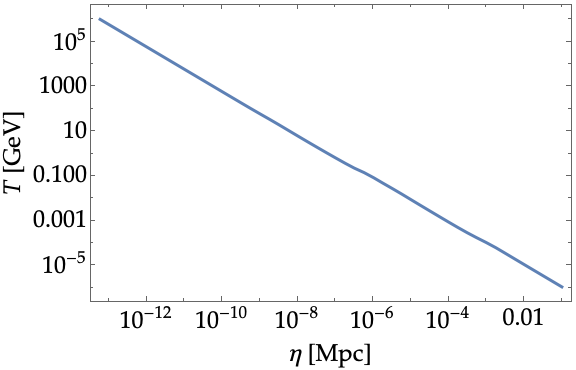

In [ ]:
LogLogPlot[Tsol[eta],{eta,etai,etaf},FrameLabel->{ToString[\[Eta]]<>" [Mpc]",ToString[TraditionalForm[T]]<>" [GeV]"}]


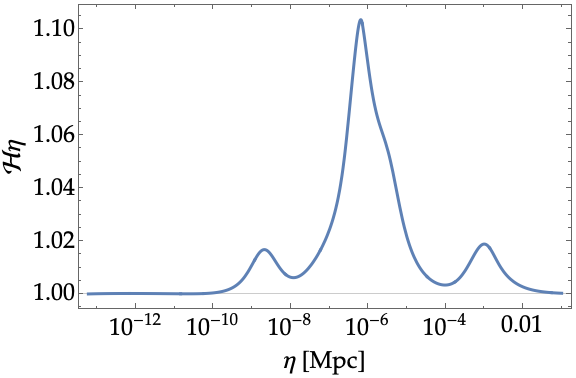

In [ ]:
LogLinearPlot[calHsol[eta] GeVinMpcinv eta,{eta,etai,etaf},PlotRange->Full,GridLines->{None,{1}},FrameLabel->{ToString[\[Eta]]<>" [Mpc]",\[ScriptCapitalH]\[Eta]}]